In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [ ]:
response = requests.get("https://www.worldometers.info/coronavirus/")

In [ ]:
web_page = response.text

In [ ]:
soup = BeautifulSoup(web_page, "html.parser")

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x
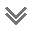

In [ ]:
print(soup.prettify())

In [ ]:
covid_table = soup.find("table", attrs={"id": "main_table_countries_today"})
head = covid_table.thead.find_all("tr") 

In [ ]:
headings = []
for th in head[0].find_all("th"):
    headings.append(th.text)

print(headings)

['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop\n', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']


In [ ]:
body = covid_table.tbody.find_all("tr")

In [ ]:
data = []
for r in range(1,len(body)):
    row = [] 
    for tr in body[r].find_all("td"):
        row.append(tr.text.replace("\n","").strip())
    data.append(row)

In [ ]:
df = pd.DataFrame(data,columns=headings)
df.head(15)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,Asia,"217,257,040",,"1,546,094",,"200,957,012","+20,180","14,753,934","15,630",...,,,,Asia,,,,,,
1,,Europe,"249,247,411",,"2,059,481",,"245,188,503","+12,414","1,999,427","5,868",...,,,,Europe,,,,,,
2,,South America,"68,671,718",,"1,355,254",,"66,459,408",,"857,056","10,123",...,,,,South America,,,,,,
3,,Oceania,"14,309,481",,"27,779",,"14,137,845",,"143,857",86,...,,,,Australia/Oceania,,,,,,
4,,Africa,"12,823,205",,"258,762",,"12,085,179",,"479,264",548,...,,,,Africa,,,,,,
5,,,721,,15,,706,,0,0,...,,,,,,,,,,
6,,World,"688,954,861",0,"6,879,918",0,"661,314,287","+32,594","20,760,656","38,518",...,,,,All,,,,,,
7,1,USA,"107,041,325",,"1,164,340",,"105,064,981",,"812,004","1,097",...,"1,180,066,018","3,524,634","334,805,269",North America,3,288,0,,,"2,425"
8,2,India,"44,985,705",,"531,824",,"44,445,206",,"8,675",N/A,...,"929,310,546","660,664","1,406,631,776",Asia,31,"2,645",2,,,6
9,3,France,"40,054,863",,"167,052",,"39,823,190","+4,030","64,621",869,...,"271,490,188","4,139,547","65,584,518",Europe,2,393,0,,,985


In [ ]:
data = df[df["#"]!=""].reset_index(drop=True)
data = data.drop_duplicates(subset = ["Country,Other"])
data

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,1,USA,"107,041,325",,"1,164,340",,"105,064,981",,"812,004","1,097",...,"1,180,066,018","3,524,634","334,805,269",North America,3,288,0,,,"2,425"
1,2,India,"44,985,705",,"531,824",,"44,445,206",,"8,675",N/A,...,"929,310,546","660,664","1,406,631,776",Asia,31,"2,645",2,,,6
2,3,France,"40,054,863",,"167,052",,"39,823,190","+4,030","64,621",869,...,"271,490,188","4,139,547","65,584,518",Europe,2,393,0,,,985
3,4,Germany,"38,422,054",,"173,995",,"38,226,900",,"21,159",N/A,...,"122,332,384","1,458,359","83,883,596",Europe,2,482,1,,,252
4,5,Brazil,"37,553,337",,"702,421",,"36,249,161",,"601,755",N/A,...,"63,776,166","296,146","215,353,593",South America,6,307,3,,,"2,794"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,227,Vatican City,29,,,,29,,0,,...,,,799,Europe,28,,,,,
227,228,Western Sahara,10,,1,,9,,0,,...,,,"626,161",Africa,"62,616","626,161",,,,
228,229,MS Zaandam,9,,2,,7,,0,,...,,,,,,,,,,
229,230,Tokelau,5,,,,,,5,,...,,,"1,378",Australia/Oceania,276,,,,,"3,628"


In [ ]:
cols = ['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious,Critical', 'TotalTests']

data_final = data[cols]

In [ ]:
data_final

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests
0,USA,"107,041,325",,"1,164,340",,"105,064,981",,"812,004","1,097","1,180,066,018"
1,India,"44,985,705",,"531,824",,"44,445,206",,"8,675",N/A,"929,310,546"
2,France,"40,054,863",,"167,052",,"39,823,190","+4,030","64,621",869,"271,490,188"
3,Germany,"38,422,054",,"173,995",,"38,226,900",,"21,159",N/A,"122,332,384"
4,Brazil,"37,553,337",,"702,421",,"36,249,161",,"601,755",N/A,"63,776,166"
...,...,...,...,...,...,...,...,...,...,...
226,Vatican City,29,,,,29,,0,,
227,Western Sahara,10,,1,,9,,0,,
228,MS Zaandam,9,,2,,7,,0,,
229,Tokelau,5,,,,,,5,,
